In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diamonds_new.csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:

data.shape
print("\n")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [6]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [7]:
data[data['x']==0]

,carat,cut,color,clarity,table,x,y,z,price_new
11182,1.07,Ideal,F,SI2,56.0,0.0,6.62,0.0,2477.0
11963,1.00,Very Good,H,VS2,53.0,0.0,0.00,0.0,2569.5
15951,1.14,Fair,G,VS1,67.0,0.0,0.00,0.0,3190.5
24520,1.56,Ideal,G,VS2,54.0,0.0,0.00,0.0,6400.0
26243,1.20,Premium,D,VVS1,59.0,0.0,0.00,0.0,7843.0
27429,2.25,Premium,H,SI2,59.0,0.0,0.00,0.0,9017.0
49556,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0
49557,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0


In [8]:
zero_index = data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index

In [9]:
zero_index 

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [10]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [11]:
data = data.drop(zero_index)

In [12]:
data['carat']=data['carat'].fillna(data['carat'].median())

In [13]:
data['table']=data['table'].fillna(data['table'].median())

In [14]:
data['color']=data['color'].fillna(data['color'].mode()[0])

In [15]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

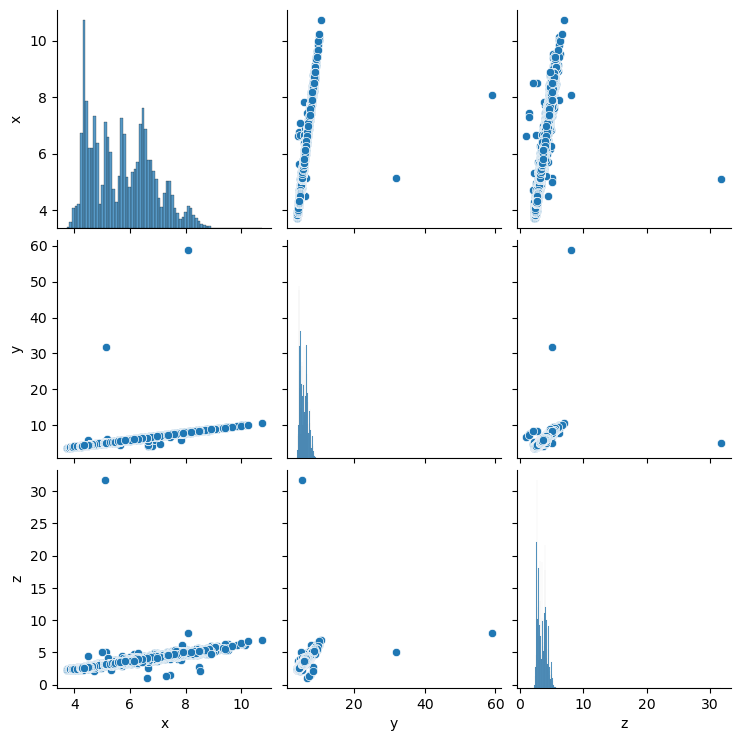

In [16]:
sns.pairplot(data[['x','y','z']])
plt.show()

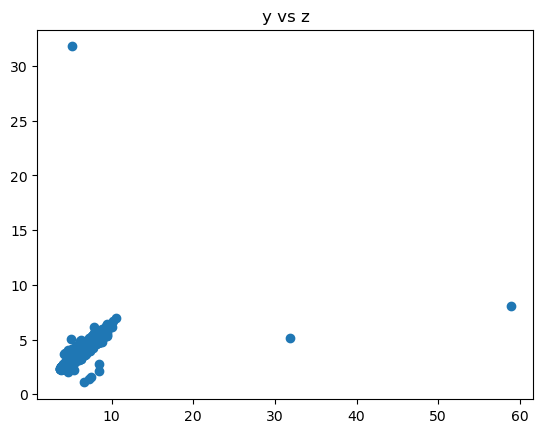

In [17]:
plt.scatter(data['y'],data['z'])
plt.title('y vs z')
plt.show()

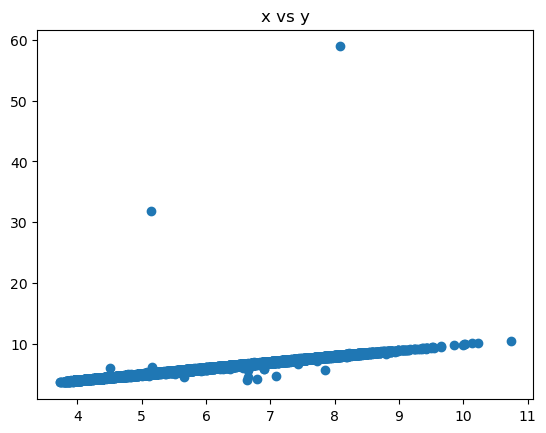

In [18]:
plt.scatter(data['x'],data['y'])
plt.title('x vs y')
plt.show()

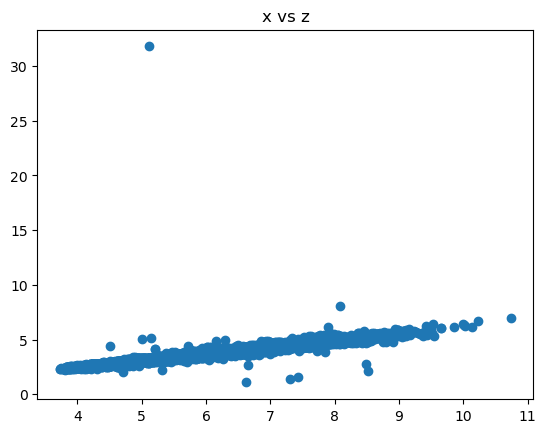

In [19]:
plt.scatter(data['x'],data['z'])
plt.title('x vs z')
plt.show()

In [20]:
data[data['x']>30].index

Int64Index([], dtype='int64')

In [21]:
data[data['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [22]:
data[data['z']>30].index

Int64Index([48410], dtype='int64')

In [23]:
data=data.drop([24067,49189])

In [24]:
data=data.drop([48410])

In [25]:
data.describe()

,carat,table,x,y,z,price_new
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,57.457134,5.731986,5.733796,3.539523,1966.026702
std,0.473967,2.234069,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


In [26]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [27]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [28]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [30]:
data['color']=label.fit_transform(data['color'])

In [31]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,1,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,1,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,1,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,5,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,6,SI2,58.0,4.34,4.35,2.75,167.5


In [32]:
#one hot encoding in cut and clarity

In [33]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [34]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [35]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [36]:
req_cols=['carat','cut','color','clarity','table','x','y','z']
x=data[req_cols]
y=data['price_new']

In [37]:
x.head()

,carat,cut,color,clarity,table,x,y,z
0,0.23,Ideal,1,SI2,55.0,3.95,3.98,2.43
1,0.21,Premium,1,SI1,61.0,3.89,3.84,2.31
2,0.23,Good,1,VS1,65.0,4.05,4.07,2.31
3,0.29,Premium,5,VS2,58.0,4.20,4.23,2.63
4,0.31,Good,6,SI2,58.0,4.34,4.35,2.75


In [38]:
y.head()

0    163.0
1    163.0
2    163.5
3    167.0
4    167.5
Name: price_new, dtype: float64

In [39]:
x=pd.get_dummies(x,dtype=int)

In [40]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,1,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,1,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,1,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,5,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,6,SI2,58.0,4.34,4.35,2.75,167.5


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=lr.predict(x_test)

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
mse=mean_squared_error(y_test,y_pred)

In [48]:
x.columns

Index(['carat', 'color', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [49]:
mse

320039.5476600954

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [52]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred=dt.predict(x_test)

In [56]:
dt_mse=mean_squared_error(y_test,y_pred)

In [57]:
dt_mse

138087.27897274244

In [63]:
dt_mae=mean_absolute_error(y_test,y_pred)

dt_r2=r2_score(y_test,y_pred)

In [64]:
print("mean squared error is:",dt_mse)
print("mean absolute error is:",dt_mae)
print("r2 score is :",dt_r2)

mean squared error is: 138087.27897274244
mean absolute error is: 182.27637678472092
r2 score is : 0.96497564434305
